# Linear Regression Tutorial
by Marc Deisenroth

The purpose of this notebook is to practice implementing some linear algebra (equations provided) and to explore some properties of linear regression.

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^{-2})
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this tutorial, we are interested in finding good parameters $\boldsymbol\theta$.

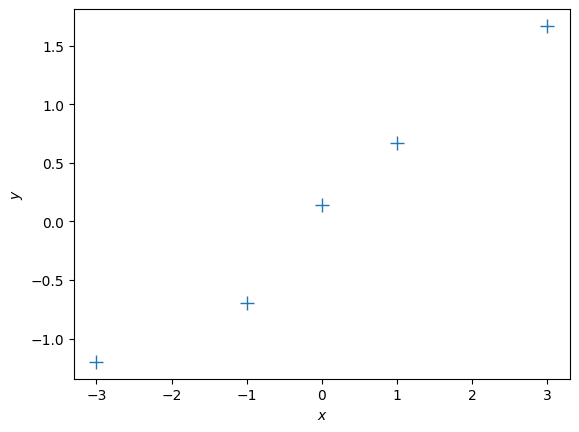

In [3]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

## 1. Maximum Likelihood
We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta_{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

Let us compute the maximum likelihood estimate for a given training set

In [4]:
## EDIT THIS FUNCTION
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    theta_ml = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    return theta_ml

In [5]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X,y)

Now, make a prediction using the maximum likelihood estimate that we just found

In [6]:
## EDIT THIS FUNCTION
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = np.dot(Xtest, theta)
    
    return prediction 

Now, let's see whether we got something useful:

[[0.499]]


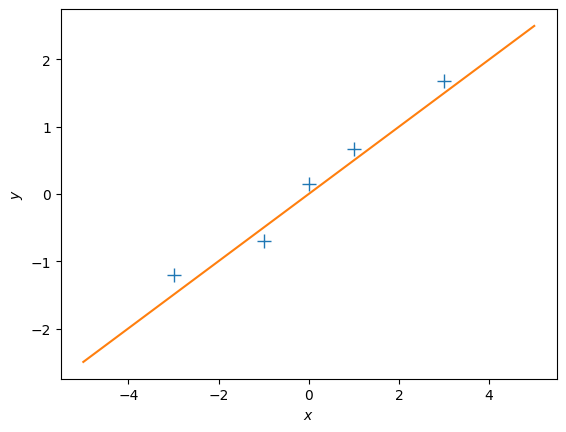

In [7]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)
print(theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Questions
1. Does the solution above look reasonable?
2. Play around with different values of $\theta$. How do the corresponding functions change?
3. Modify the training targets $\mathcal Y$ and re-run your computation. What changes?

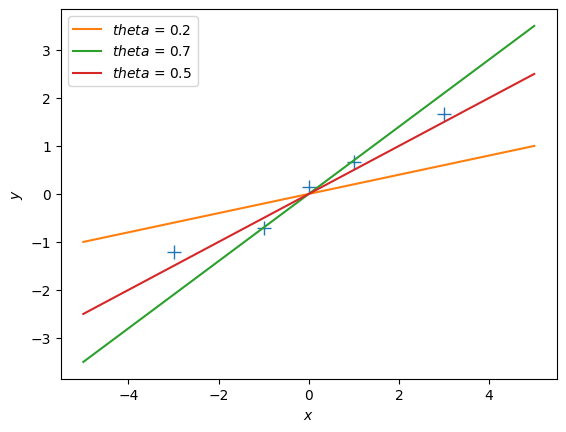

In [8]:
############################
# 2. Play around with different values of $\theta$. How do the corresponding functions change?
############################

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
pred_1 = predict_with_estimate(Xtest, 0.2)
pred_2 = predict_with_estimate(Xtest, 0.7)
pred_3 = predict_with_estimate(Xtest, 0.5)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, pred_1, label='$theta$ = 0.2')
plt.plot(Xtest, pred_2, label="$theta$ = 0.7")
plt.plot(Xtest, pred_3, label="$theta$ = 0.5")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

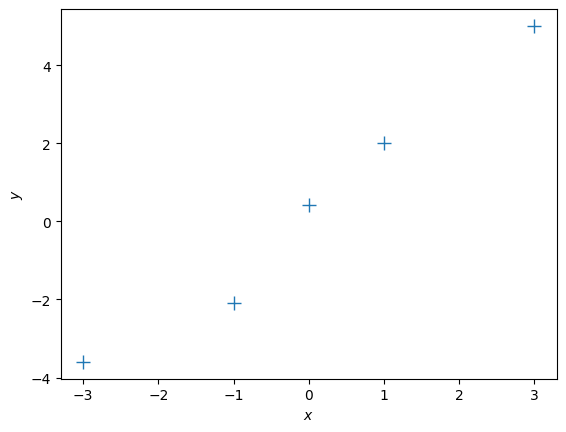

In [9]:
############################
# 3. Modify the training targets $\mathcal Y$ and re-run your computation. What changes?
############################

my_y = y * 3
# Plot the training set
plt.figure()
plt.plot(X, my_y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

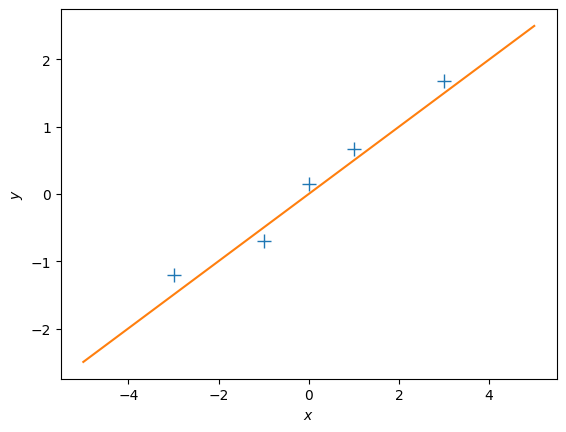

In [10]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
predicted_targets = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, predicted_targets)
plt.xlabel("$x$")
plt.ylabel("$y$");

Let us now look at a different training set, where we add 2.0 to every $y$-value, and compute the maximum likelihood estimate

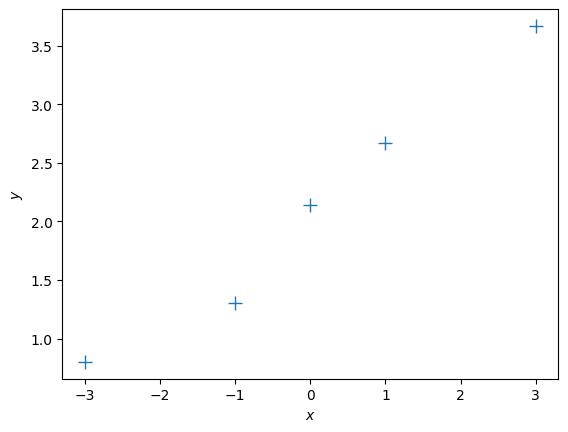

In [11]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

[[0.499]]


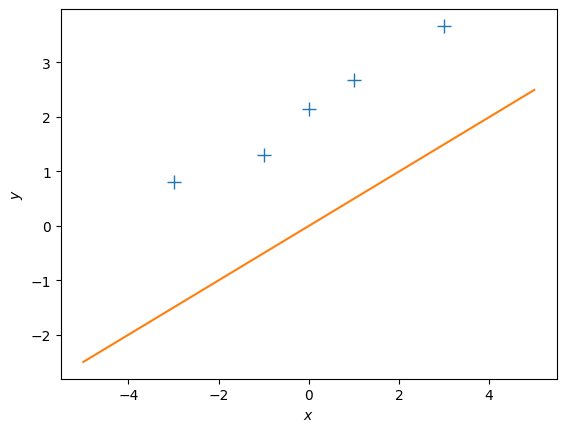

In [12]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X, ynew)
print(theta_ml)

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Question:
1. This maximum likelihood estimate doesn't look too good: The orange line is too far away from the observations although we just shifted them by 2. Why is this the case?
2. How can we fix this problem?

1. This maximum likelihood estimate doesn't look too good: The orange line is too far away from the observations although we just shifted them by 2. Why is this the case?

The model we defined is underfitting the data, or it is not flexible enought to be able to generalize to different type of data. So, if we shift the traning targets by $2$ the model will obey by this change. However if we feed the model test data that does not have this shift in it, our model is unable to correctly describe the data.

Let us now define a linear regression model that is slightly more flexible:
$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^{-2})
$$
Here, we added an offset (bias) parameter $\theta_0$ to our original model.

#### Question:
1. What is the effect of this bias parameter, i.e., what additional flexibility does it offer?

In our case it allows for a shift from the origin, which means the line this model describes does not have to go through the origin on the coordinate plane.

If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as 
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

In [13]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

Let us now compute the maximum likelihood estimator for this setting.
_Hint:_ If possible, re-use code that you have already written

In [14]:
## EDIT THIS FUNCTION
def max_lik_estimate_aug(X_aug, y):
    
    theta_aug_ml = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X_aug), X_aug)), np.transpose(X_aug)), y)
    
    return theta_aug_ml

In [15]:
theta_aug_ml = max_lik_estimate_aug(X_aug, y)

Now, we can make predictions again:

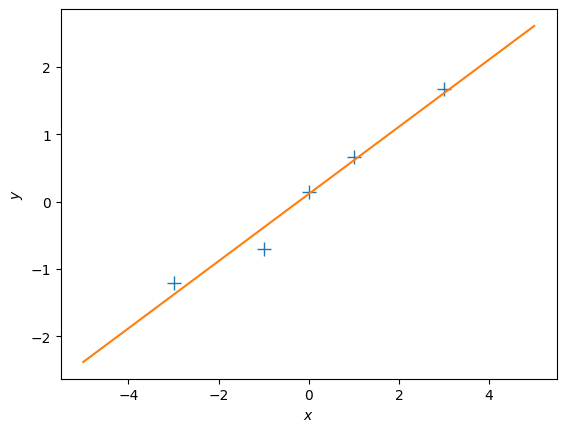

In [16]:
# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

It seems this has solved our problem! 
#### Question:
1. Play around with the first parameter of $\boldsymbol\theta_{\text{aug}}$ and see how the fit of the function changes.
2. Play around with the second parameter of $\boldsymbol\theta_{\text{aug}}$ and see how the fit of the function changes.

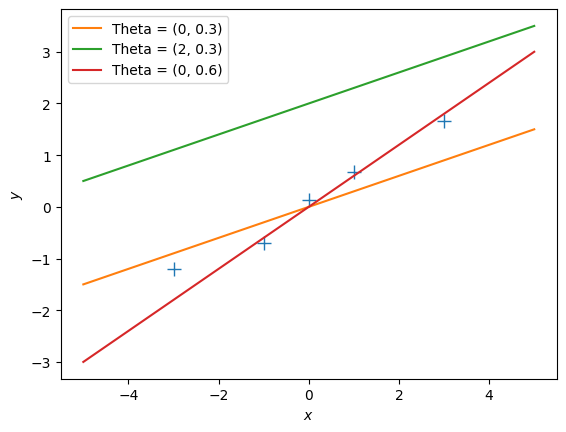

In [17]:
# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using custom theta parameters
pred_1 = predict_with_estimate(Xtest_aug, [0, 0.3])
pred_2 = predict_with_estimate(Xtest_aug, [2, 0.3])
pred_3 = predict_with_estimate(Xtest_aug, [0, 0.6])

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, pred_1, label="Theta = (0, 0.3)")
plt.plot(Xtest, pred_2, label="Theta = (2, 0.3)")
plt.plot(Xtest, pred_3, label="Theta = (0, 0.6)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

### Nonlinear Features
So far, we have looked at linear regression with linear features. This allowed us to fit straight lines. However, linear regression also allows us to fit functions that are nonlinear in the inputs $\boldsymbol x$, as long as the parameters $\boldsymbol\theta$ appear linearly. This means, we can learn functions of the form
$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
where the features $\phi_k(\boldsymbol x)$ are (possibly nonlinear) transformations of the inputs $\boldsymbol x$.

Let us have a look at an example where the observations clearly do not lie on a straight line:

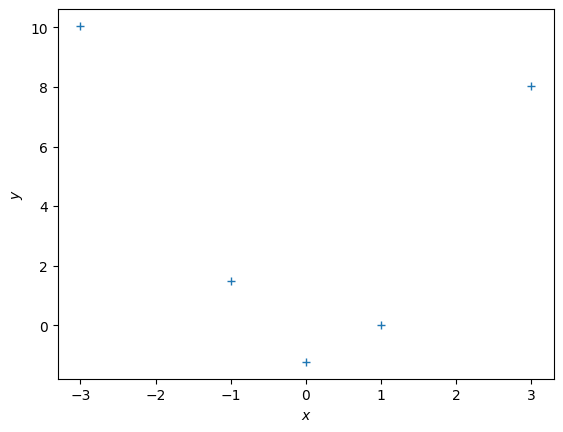

In [18]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Polynomial Regression
One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

Let us start by computing the feature matrix $\boldsymbol \Phi$

In [19]:
## EDIT THIS FUNCTION
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    Phi = np.matrix([[x**i for i in range(0, K+1)] for x in X])
    return Phi

With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [20]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate
    theta_ml = np.linalg.pinv(Phi.T@Phi + kappa*np.identity(D))@Phi.T@y

    
    return theta_ml

Now we have all the ingredients together: The computation of the feature matrix and the computation of the maximum likelihood estimator for polynomial regression. Let's see how this works.

To make predictions at test inputs $\boldsymbol X_{\text{test}}\in\mathbb{R}$, we need to compute the features (nonlinear transformations) $\boldsymbol\Phi_{\text{test}}= \boldsymbol\phi(\boldsymbol X_{\text{test}})$ of $\boldsymbol X_{\text{test}}$ to give us the predicted mean
$$
\mathbb{E}[\boldsymbol y_{\text{test}}] = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta^{\text{ML}}
$$

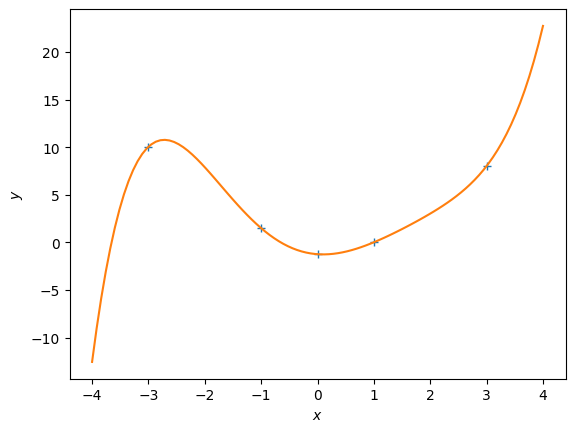

In [21]:
K = 5 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

Experiment with different polynomial degrees in the code above.

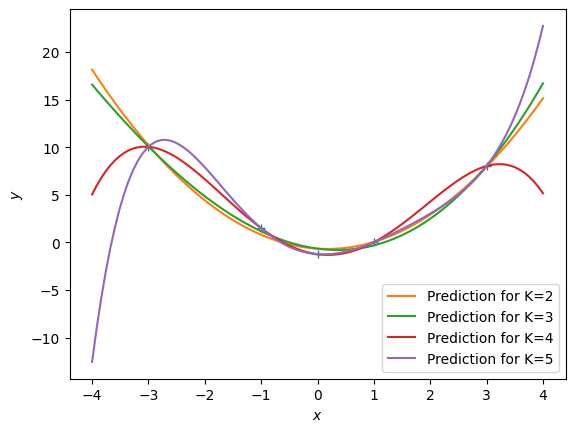

In [22]:
K = [2, 3, 4, 5]
Phi = [poly_features(X, i) for i in K]

theta_ml = [nonlinear_features_maximum_likelihood(phi, y) for phi in Phi]

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = [poly_features(Xtest, i) for i in K]

y_pred = [Phi_test[i] @ theta_ml[i] for i in range(len(K))]

plt.figure()
plt.plot(X, y, '+')
for i in range(len(K)):
    plt.plot(Xtest, y_pred[i], label=f'Prediction for K={K[i]}')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

#### Questions:
1. What do you observe?

The bigger the polynomial order the better the predictor fits the data, however this may pose a problem when trying to generalize to yet to see data.

2. What is a good fit?

It is a good fit for the observed data.

## Evaluating the Quality of the Model

Let us have a look at a more interesting data set

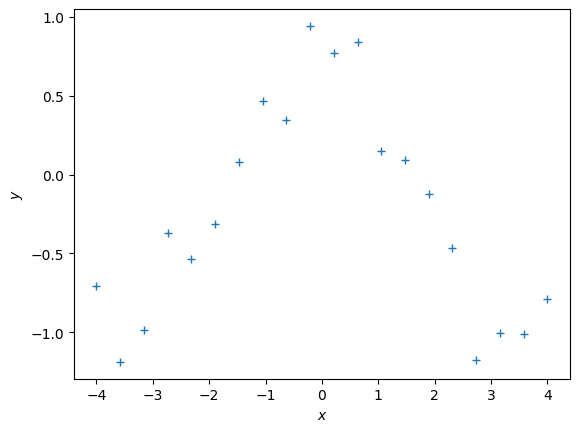

In [23]:
def f(x):   
    return np.cos(x) + 0.2*np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

Now, let us use the work from above and fit polynomials to this dataset.

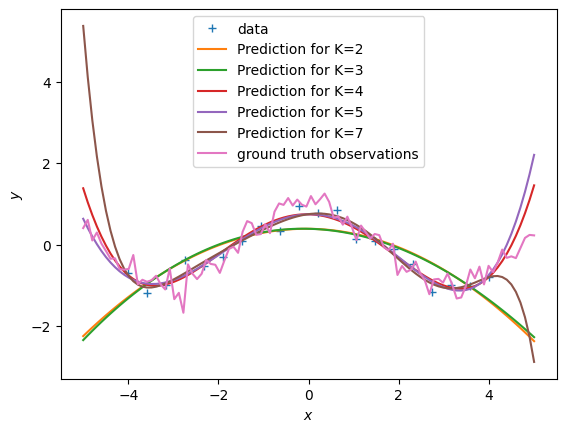

In [24]:
## EDIT THIS CELL
# Define the degree of the polynomial we wish to fit
K = [2, 3, 4, 5, 7]
# N x (K+1) feature matrix
Phi = [poly_features(X, i) for i in K]
# maximum likelihood estimator
theta_ml = [nonlinear_features_maximum_likelihood(phi, y) for phi in Phi]
# test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)
# feature matrix for test inputs
Phi_test = [poly_features(Xtest, i) for i in K]
# predicted y-values
y_pred = [Phi_test[i] @ theta_ml[i] for i in range(len(K))]
# ground-truth y-values
ytest = f(Xtest)


# plot
plt.figure()
plt.plot(X, y, '+', label='data')
for i in range(len(K)):
    plt.plot(Xtest, y_pred[i], label=f'Prediction for K={K[i]}')
plt.plot(Xtest, ytest, label="ground truth observations")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Questions:
1. Try out different degrees of polynomials. 
2. Based on visual inspection, what looks like the best fit?

It seems that for $K = 5$ the fit is reasonable

Let us now look at a more systematic way to assess the quality of the polynomial that we are trying to fit. For this, we compute the root-mean-squared-error (RMSE) between the $y$-values predicted by our polynomial and the ground-truth $y$-values. The RMSE is then defined as
$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}
$$
Write a function that computes the RMSE.

In [25]:
## EDIT THIS FUNCTION
def RMSE(y, ypred):
    N, D = y.shape
    rmse = np.sqrt(1/N * np.sum(np.power(y-ypred, 2)))
    return rmse

Now compute the RMSE for different degrees of the polynomial we want to fit.

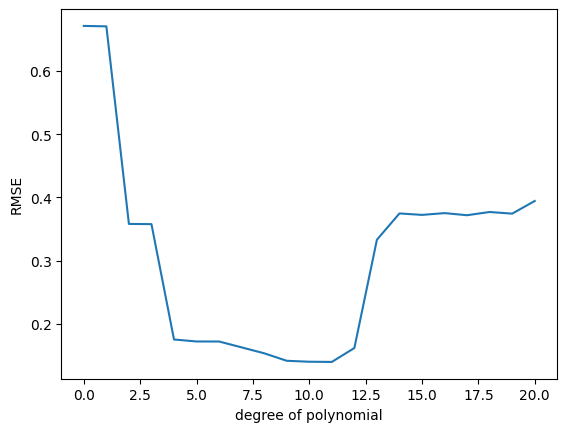

In [26]:
## EDIT THIS CELL
K_max = 20
rmse_train = np.zeros((K_max+1,))

for k in range(K_max+1):
    # N x (k+1) feature matrix
    Phi = poly_features(X, k)
    # maximum likelihood estimator
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    # predicted y-values
    y_pred = Phi @ theta_ml
    # training error
    rmse_train[k] = RMSE(y, y_pred)
        

plt.figure()
plt.plot(rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");

#### Question: 
1. What do you observe?
2. What is the best polynomial fit according to this plot?

From the traning data we infer the best fit is for $K \in [9, 12]$

3. Write some code that plots the function that uses the best polynomial degree (use the test set for this plot). What do you observe now?

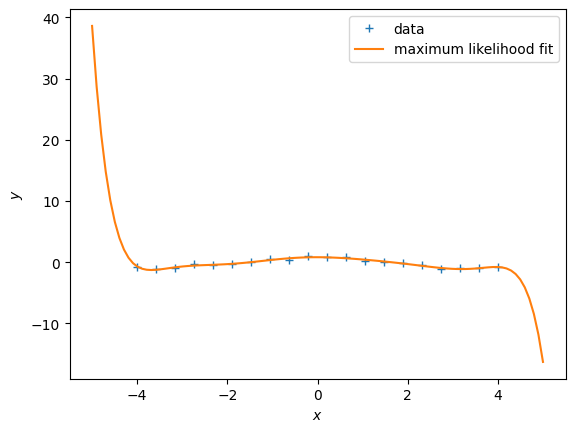

In [27]:
best_k = 9
# N x (k+1) feature matrix
Phi = poly_features(X, best_k)
# maximum likelihood estimator
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
# test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)
# N x (k+1) feature matrix
Phi_test = poly_features(Xtest, best_k)

# WRITE THE PLOTTING CODE HERE
plt.figure()
plt.plot(X, y, '+')

ypred_test = Phi_test*theta_ml ## <--- EDIT THIS LINE (hint: you may require a few lines to do the computation)

plt.plot(Xtest, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);

The RMSE on the training data is somewhat misleading, because we are interested in the generalization performance of the model. Therefore, we are going to compute the RMSE on the test set and use this to choose a good polynomial degree.

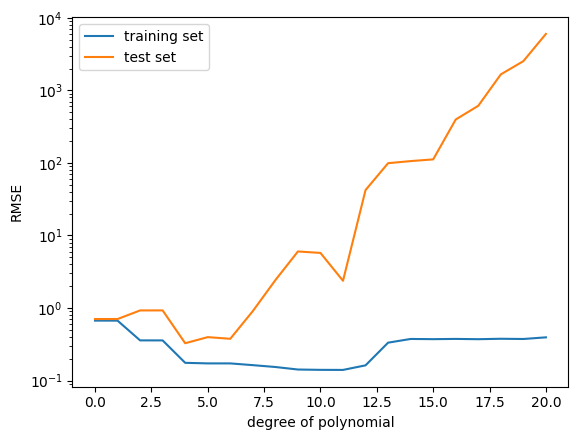

In [28]:
## EDIT THIS CELL
K_max = 20
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):
    # feature matrix
    Phi = poly_features(X, k)
    
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    # predicted y-values
    y_pred_train = Phi @ theta_ml
   
    # RMSE on training set
    rmse_train[k] = RMSE(y, y_pred_train)
            
    # feature matrix for test inputs
    Phi_test = poly_features(Xtest, k)
    
    # prediction (test set)
    ypred_test = Phi_test @ theta_ml
    
    # RMSE on test set
    rmse_test[k] = RMSE(ytest, ypred_test)
    

plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);

#### Questions:
1. What do you observe now?

We can see the model is overfittig because the empirical risk underestimates the estimated generalization error. 

2. Why does the RMSE for the test set not always go down?

Because of overfitting our $\theta$ estimate is not good enough to explain the test data, because it is too good at explaining the traning data.

3. Which polynomial degree would you choose now?

Probably $K = 3$ is a good option.

4. Plot the fit for the "best" polynomial degree.

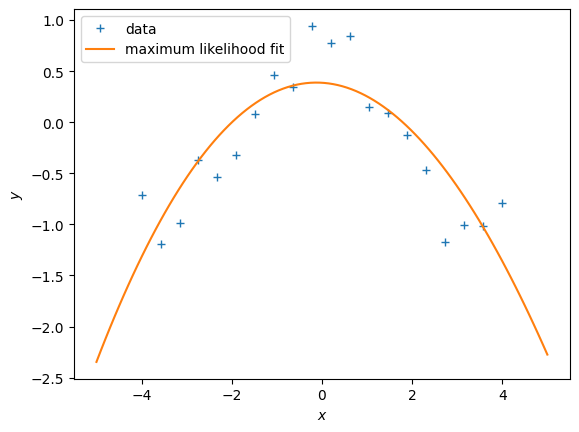

In [29]:
best_k = 3

# feature matrix
Phi = poly_features(X, best_k)
# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
# test feature matrix
Phi_test = poly_features(Xtest, best_k)


plt.figure()
plt.plot(X, y, '+')
ypred_test = Phi_test*theta_ml

plt.plot(Xtest, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);

#### Question
If you did not have a designated test set, what could you do to estimate the generalization error (purely using the training set)?

Use cross validation and partition the traning set into a traning set and a validation set.

## 2. Maximum A Posteriori Estimation

We are still considering the model
$$
y = \boldsymbol\phi(\boldsymbol x)^T\boldsymbol\theta + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^{-2})\,.
$$
We assume that the noise variance $\sigma^{-2}$ is known.

Instead of maximizing the likelihood, we can look at the maximum of the posterior distribution on the parameters $\boldsymbol\theta$, which is given as
$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{\overbrace{p(\mathcal Y|\mathcal X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(\mathcal Y|\mathcal X)}_{\text{evidence}}}
$$
The purpose of the parameter prior $p(\boldsymbol\theta)$ is to discourage the parameters to attain extreme values, a sign that the model overfits. The prior allows us to specify a "reasonable" range of parameter values. Typically, we choose a Gaussian prior $\mathcal N(\boldsymbol 0, \alpha^2\boldsymbol I)$, centered at $\boldsymbol 0$ with variance $\alpha^2$ along each parameter dimension.

The MAP estimate of the parameters is
$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^{-2}}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
where $\sigma^{-2}$ is the variance of the noise.

In [30]:
## EDIT THIS FUNCTION
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = Phi.shape[1] 
    
    theta_map = np.linalg.pinv(Phi.T @ Phi + sigma/alpha * np.identity(D)) @ Phi.T @ y
    
    return theta_map

In [31]:
# define the function we wish to estimate later
def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    return p @ w + sigma*np.random.normal(size=x.shape) 

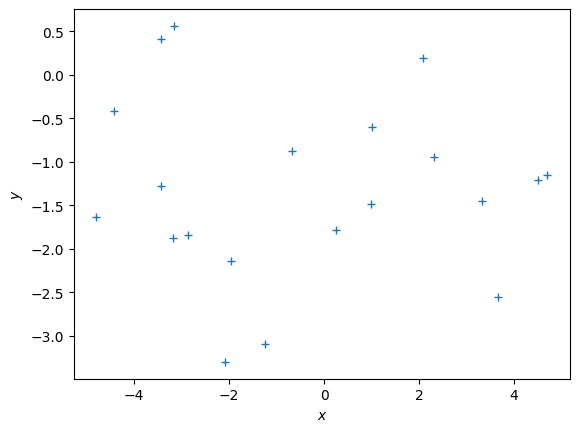

In [32]:
# Generate some data
sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior
N = 20

np.random.seed(42)

X = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y = g(X, sigma) # training targets

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

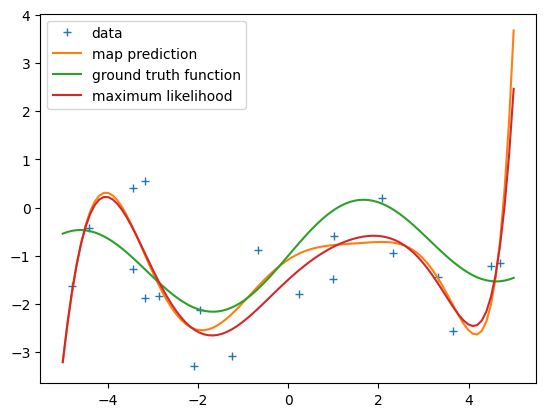

In [33]:
# get the MAP estimate
K = 8 # polynomial degree   


# feature matrix
Phi = poly_features(X, K)

# maximum a posteriori estimate
theta_map = map_estimate_poly(Phi, y, sigma, alpha)

# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, g(Xtest, 0))
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"]);

In [34]:
print(np.hstack([theta_ml, theta_map]))

[[-1.49712990e+00 -1.08154986e+00]
 [ 8.56868907e-01  6.09177030e-01]
 [-1.28335731e-01 -3.62071208e-01]
 [-7.75319495e-02 -3.70531921e-03]
 [ 3.56425470e-02  7.43090617e-02]
 [-4.11626761e-03 -1.03278644e-02]
 [-2.48817785e-03 -4.89363010e-03]
 [ 2.70146692e-04  4.24148550e-04]
 [ 5.35996054e-05  1.03384718e-04]]


Now, let us compute the RMSE for different polynomial degrees and see whether the MAP estimate addresses the overfitting issue we encountered with the maximum likelihood estimate.

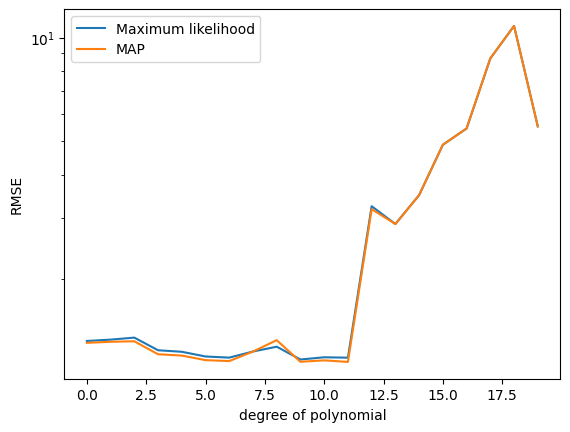

In [35]:
## EDIT THIS CELL

K_max = 19 # this is the maximum degree of polynomial we will consider
assert(K_max < N) # this is the latest point when we'll run into numerical problems

sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior

rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))

# Test dataset
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

for k in range(K_max+1):
    # feature matrix
    Phi = poly_features(X, k)

    # maximum a posteriori estimate
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)

    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

    # feature matrix on test dataset
    Phi_test = poly_features(Xtest, k)

    # MAP based prediction
    y_pred_test_map = Phi_test @ theta_map

    # MLE based prediction
    y_pred_test_mle = Phi_test @ theta_ml
   
    ## Compute the maximum likelihood estimator, compute the test-set predicitons, compute the RMSE
    rmse_mle[k] = RMSE(ytest, y_pred_test_mle) 
    ## Compute the MAP estimator, compute the test-set predicitons, compute the RMSE
    rmse_map[k] = RMSE(ytest, y_pred_test_map)

plt.figure()
plt.semilogy(rmse_mle) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_map) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])

#### Questions:
1. What do you observe?
2. What is the influence of the prior variance on the parameters ($\alpha^2$)? Change the parameter and describe what happens.

The less the prior variance the bigger the RMSE. Note we stablished the prior distribution on the parameters $\theta$ acted as a regularization parameter, so why is the RMSE bigger than in the MLE case?

Whe have:

$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^{-2}}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

If $\alpha  >> \sigma$ then $\frac{\sigma^{-2}}{\alpha^2} \approx 0$, therefore the MAP parameter estimation and the MLE are virtually the same. However when $\alpha << \sigma$, we are defining defining a prior distribution on $\theta$ with very little uncertainty, so our prior belief on $\theta$ is not very flexible.

## 3. Bayesian Linear Regression

In [37]:
# Test inputs
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

prior_var = 2.0 # variance of the parameter prior (alpha^2). We assume this is known.
noise_var = 1.0 # noise variance (sigma^2). We assume this is known.

pol_deg = 3 # degree of the polynomial we consider at the moment

Assume a parameter prior $p(\boldsymbol\theta) = \mathcal N (\boldsymbol 0, \alpha^2\boldsymbol I)$. For every test input $\boldsymbol x_*$ we obtain the 
prior mean
$$
E[f(\boldsymbol x_*)] = 0
$$
and the prior (marginal) variance (ignoring the noise contribution)
$$
V[f(\boldsymbol x_*)] = \alpha^2\boldsymbol\phi(\boldsymbol x_*) \boldsymbol\phi(\boldsymbol x_*)^\top
$$
where $\boldsymbol\phi(\cdot)$ is the feature map.

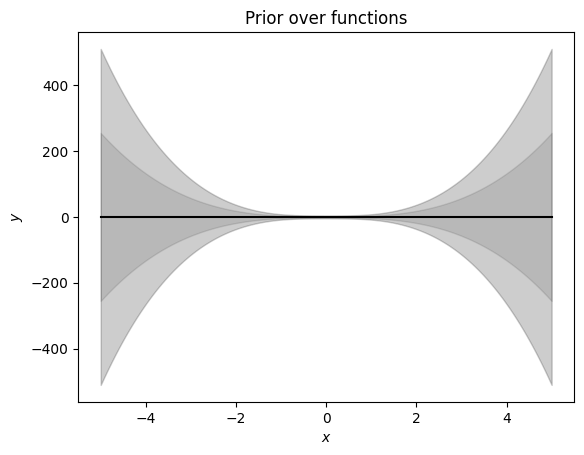

In [62]:
## EDIT THIS CELL

# compute the feature matrix for the test inputs
Phi_test = poly_features(Xtest, pol_deg)  # N x (pol_deg+1) feature matrix
#raise NotImplementedError

# compute the (marginal) prior at the test input locations
# prior mean
prior_mean = np.zeros((Ntest,1))  # prior mean at test inputs (size: (Ntest,1))
#raise NotImplementedError

# prior variance
full_covariance = prior_var**2 * Phi_test @ Phi_test.T # N x N covariance matrix of all function values
prior_marginal_var = np.diag(full_covariance) # marginal of size (N, )
#raise NotImplementedError

# Let us visualize the prior over functions
plt.figure()
plt.plot(Xtest, prior_mean, color="k")

conf_bound1 = np.sqrt(prior_marginal_var).flatten()
conf_bound2 = 2.0*np.sqrt(prior_marginal_var).flatten()
conf_bound3 = 2.0*np.sqrt(prior_marginal_var + noise_var).flatten()
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound1, 
             prior_mean.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound2, 
                 prior_mean.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound3, 
                 prior_mean.flatten() - conf_bound3, alpha = 0.1, color="k")

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Prior over functions");

Now, we will use this prior distribution and sample functions from it.

Every sampled function is a polynomial of degree 3


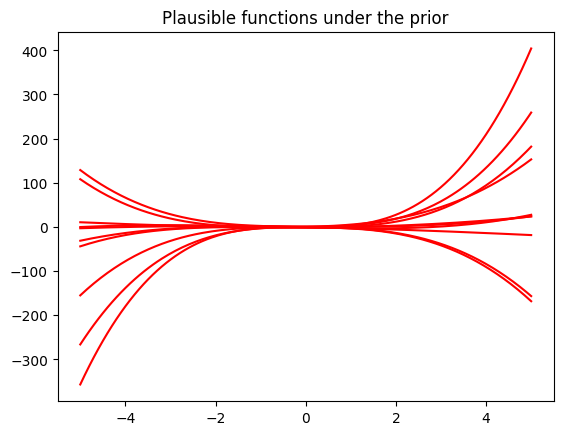

In [39]:
## EDIT THIS CELL

# compute the feature matrix for the test inputs
Phi_test = poly_features(Xtest, pol_deg)  # N x (pol_deg+1) feature matrix

# samples from the prior
num_samples = 10

# We first need to generate random weights theta_i, which we sample from the parameter prior
random_weights = np.random.normal(size=(pol_deg+1,num_samples), scale=np.sqrt(prior_var))

# Now, we compute the induced random functions, evaluated at the test input locations
# Every function sample is given as f_i = Phi * theta_i, 
# where theta_i is a sample from the parameter prior

sample_function = np.array([(Phi_test @ theta_i).T for theta_i in random_weights.T]).reshape(10,-1).T

plt.figure()
plt.plot(Xtest, sample_function, color="r")
plt.title("Plausible functions under the prior")
print("Every sampled function is a polynomial of degree "+str(pol_deg));

Now we are given some training inputs $\boldsymbol x_1, \dotsc, \boldsymbol x_N$, which we collect in a matrix $\boldsymbol X = [\boldsymbol x_1, \dotsc, \boldsymbol x_N]^\top\in\mathbb{R}^{N\times D}$

In [40]:
N = 10
X = np.random.uniform(high=5, low=-5, size=(N,1)) # training inputs, size Nx1
y = g(X, np.sqrt(noise_var)) # training targets, size Nx1

Now, let us compute the posterior 

$$
p(\theta|\mathcal{X}, \mathcal{Y}) = \exp (\log p(\theta|\mathcal{X}, \mathcal{Y})) = \exp [\log (p(\mathcal{Y}|\theta, \mathcal{X}) \cdot p(\theta))] = 
$$

$$
= \exp [\log (p(\mathcal{Y}|\theta, \mathcal{X})) + \log(p(\theta))]
$$

$$
= \exp [\log (\mathcal{N}(y|\phi^T(x)\theta, \sigma^{2})) + \log(\mathcal{N}(\theta|0, \alpha^2I))]
$$

$$
= \exp \left[\log \frac{1}{\sqrt{2\pi\sigma^{2}}} + \log \exp -\frac{1}{2\sigma^{2}}(y - \phi(x)\theta)^T(y - \phi(x)\theta)

+ \log \frac{1}{\sqrt{2\pi\alpha^2}} + \log \exp -\frac{1}{2\alpha^2}\theta^T\theta \right]
$$

$$
= \exp \left[\log \frac{1}{\sqrt{2\pi\sigma^{2}}} + \log \frac{1}{\sqrt{2\pi\alpha^2}} - \frac{1}{2} \left(\sigma^{-2} (y - \phi(x)\theta)^T(y - \phi(x)\theta) + \alpha^2 \theta^T\theta\right) \right]
$$

$$
= \exp \left[ const - \frac{1}{2} \left(\sigma^{-2} y^Ty - \sigma^{-2}y^T\phi(x)\theta - \sigma^{-2}(\phi(x)\theta)^Ty + \sigma^{-2}\theta^T\phi^T(x)\phi(x)\theta + \alpha^2 \theta^T\theta\right) \right]
$$

$$
= \exp \left[ const - \frac{1}{2} \left( -\theta^T \left(\sigma^{-2} \phi^T(x)\phi(x) + \alpha^2\right)\theta - \sigma^{-2}y^T\phi(x)\theta - \sigma^{-2}(\phi(x)\theta)^Ty + \sigma^{-2} y^Ty\right)\right]
$$

$$
= \exp \left[ const - \frac{1}{2} \left( -\theta^T \left(\sigma^{-2} \phi^T(x)\phi(x) + \alpha^2\right)\theta - \sigma^{-2}y^T\phi(x)\theta - \sigma^{-2}y^T(\phi(x)\theta) + \sigma^{-2} y^Ty\right)\right]
$$

$$
= \exp \left[ const - \frac{1}{2} \left[ -\theta^T \left(\sigma^{-2} \phi^T(x)\phi(x) + \alpha^2\right)\theta - 2\sigma^{-2}y^T\phi(x)\theta + \sigma^{-2} y^Ty\right]\right]
$$

---

$$
p(\theta|\mathcal{Y}, \mathcal{X}) = \mathcal{N}(\theta|m_N, S_N)
$$

$$
\log p(\theta|\mathcal{Y}, \mathcal{X}) \propto \log \exp (-\frac{1}{2}(\theta - m_N)^TS_N^{-1}(\theta - m_N))
$$

$$
= -\frac{1}{2}(\theta - m_N)^TS_N^{-1}(\theta - m_N)
$$

$$
= -\frac{1}{2} (\theta^TS_N^{-1}\theta - \theta^TS_N^{-1}m_N -m_N^TS_N^{-1}\theta + m_N^TS_N^{-1}m_N)
$$

$$
= -\frac{1}{2} (\theta^TS_N^{-1}\theta -2m_N^TS_N^{-1}\theta + m_N^TS_N^{-1}m_N)
$$

Such that:

$$
S_N^{-1} = \sigma^{-2} \phi^T(x)\phi(x) + \alpha^2
$$

$$
S_N = (\sigma^{-2}\phi^T(x)\phi(x) + \alpha^{-2})^{-1}
$$

and

$$
m_N^TS_N^{-1} = \sigma^{-2}y^T\phi(x)
$$

$$
m_N^T = (\sigma^{-2}y^T\phi(x))S_N
$$

$$
m_N = S_N(\sigma^{-2}y^T\phi(x))^T
$$

$$
m_N = \sigma^{-2}S_N\phi^T(x)y
$$

In [107]:
## EDIT THIS FUNCTION

def polyfit(X, y, K, prior_var, noise_var):
    # X: training inputs, size N x D
    # y: training targets, size N x 1
    # K: degree of polynomial we consider
    # prior_var: prior variance of the parameter distribution
    # sigma: noise variance
    
    jitter = 1e-08 # increases numerical stability
    
    Phi = poly_features(X, K) # N x (K+1) feature matrix 
    
    # Compute maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    # MAP estimate
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)
    
    # Parameter posterior
    SN = np.linalg.pinv(prior_var**(-2) + noise_var**(-2) * Phi.T @ Phi) # covariance matrix of the parameter posterior
    mN = SN @ (noise_var**(-2) * Phi.T @ y) # mean vector of the parameter posterior 
    
    #raise NotImplementedError
    
    return (theta_ml, theta_map, mN, SN)

In [108]:
theta_ml, theta_map, theta_mean, theta_var = polyfit(X, y, pol_deg, alpha, sigma)

Now, let's make predictions (ignoring the measurement noise). We obtain three predictors:
\begin{align}
&\text{Maximum likelihood: }E[f(\boldsymbol X_{\text{test}})] = \boldsymbol \phi(X_{\text{test}})\boldsymbol \theta_{ml}\\
&\text{Maximum a posteriori: } E[f(\boldsymbol X_{\text{test}})] = \boldsymbol \phi(X_{\text{test}})\boldsymbol \theta_{map}\\
&\text{Bayesian: } p(f(\boldsymbol X_{\text{test}})) = \mathcal N(f(\boldsymbol X_{\text{test}}) \,|\, \boldsymbol \phi(X_{\text{test}}) \boldsymbol\theta_{\text{mean}},\, \boldsymbol\phi(X_{\text{test}}) \boldsymbol\theta_{\text{var}}  \boldsymbol\phi(X_{\text{test}})^\top)
\end{align}

Such that:

$$
\mathbb{E}_{p(f(\boldsymbol X_{\text{test}}))}[f(\boldsymbol X_{\text{test}})]= \boldsymbol \phi(X_{\text{test}}) \boldsymbol\theta_{\text{mean}}
$$

and 

$$
\mathbb{V}_{p(f(\boldsymbol X_{\text{test}}))}[f(\boldsymbol X_{\text{test}})]= \boldsymbol\phi(X_{\text{test}}) \boldsymbol\theta_{\text{var}}  \boldsymbol\phi(X_{\text{test}})
$$

We already computed all quantities. Write some code that implements all three predictors.

In [109]:
## EDIT THIS CELL
# compute the feature matrix for the test inputs
Phi_test = poly_features(Xtest, pol_deg)  # N x (pol_deg+1) feature matrix

# predictions (ignoring the measurement/observations noise)

theta_ml, theta_map, mN, SN = polyfit(X, y, pol_deg, prior_var, noise_var)

# maximum likelihood predictions (just the mean)
m_mle_test = Phi_test @ theta_ml

# MAP predictions (just the mean)
m_map_test = Phi_test @ theta_map

# predictive distribution (Bayesian linear regression)
# mean prediction
mean_blr = np.asarray(Phi_test @ mN)
# # variance prediction
cov_blr =  np.asarray(Phi_test @ SN @ Phi_test.T)

# raise NotImplementedError

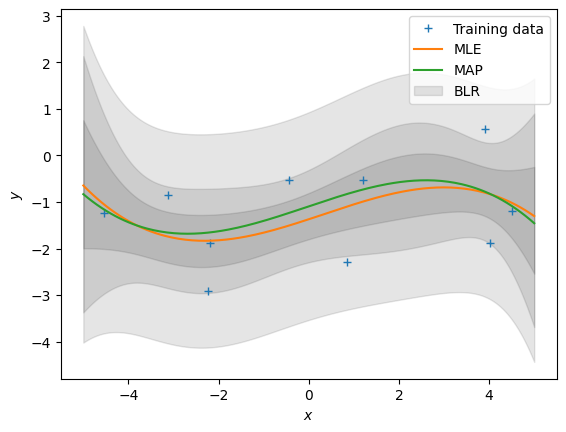

In [110]:
# plot the posterior
plt.figure()
plt.plot(X, y, "+")
plt.plot(Xtest, m_mle_test)
plt.plot(Xtest, m_map_test)
var_blr = np.diag(cov_blr)
conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()


plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound1, 
                 mean_blr.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound2, 
                 mean_blr.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound3, 
                 mean_blr.flatten() - conf_bound3, alpha = 0.1, color="k")
plt.legend(["Training data", "MLE", "MAP", "BLR"])
plt.xlabel('$x$');
plt.ylabel('$y$');